# **Lectura de datos Geoespaciales**

`GeoPandas` es una de las bibliotecas más utilizadas en Python para el análisis y manipulación de datos geoespaciales. Una de sus funciones principales es **[read_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)**, que permite cargar archivos vectoriales en un GeoDataFrame, facilitando su procesamiento y análisis. En este artículo, exploraremos cómo funciona `read_file()`, sus parámetros principales y qué tecnologías utiliza en el fondo para la lectura de archivos geoespaciales.

## **Función `read_file`**

La función **`read_file`** permite leer archivos geoespaciales y cargarlos en un **GeoDataFrame**, que es la estructura de datos de GeoPandas para manejar información geográfica.

### Sintaxis

Su sintaxis es la siguiente:

```{note}
**geopandas.read_file**(filename, bbox=None, mask=None, columns=None, rows=None, engine=None, **kwargs)

Parámetros principales:

* **filename**: (Obligatorio) Ruta del archivo a leer (local o URL).
* **layer**: Nombre de la capa si el archivo tiene varias (ejemplo: en un GeoPackage).
* **bbox**: Filtra los datos en la lectura usando un bounding box (minx, miny, maxx, maxy).
* **mask**: Filtra los datos con una geometría de referencia (ejemplo: un polígono de corte).
* **rows**: Número máximo de filas a leer (útil para grandes volúmenes de datos).
* **engine**: Define el motor de lectura: "fiona" (por defecto) o "pyogrio" (más rápido para archivos grandes).
```

### **¿Cómo funciona read_file internamente?**

**`read_file`** necesita una biblioteca especializada para leer archivos espaciales. Puede usar dos motores:

* **Fiona (motor predeterminado)**

    `read_file` utiliza por defecto la biblioteca **Fiona** para la lectura de datos espaciales. Fiona actúa como una interfaz en Python para GDAL (Geospatial Data Abstraction Library), lo que permite acceder a una amplia variedad de formatos vectoriales de manera eficiente.

* **Pyogrio (alternativa optimizada)**

    También es posible seleccionar **Pyogrio** como motor de lectura mediante el parámetro **`engine`**. **Pyogrio** ofrece un rendimiento superior, especialmente al **trabajar con grandes volúmenes de datos**, gracias a su implementación optimizada basada en OGR.

Varificamos los formatos soportados por `fiona` y `pyogrio`

In [1]:
import fiona
fiona.drvsupport.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [2]:
import pyogrio
pyogrio.list_drivers()

{'PCIDSK': 'rw',
 'PDS4': 'rw',
 'VICAR': 'rw',
 'PDF': 'rw',
 'MBTiles': 'rw',
 'EEDA': 'r',
 'OGCAPI': 'r',
 'ESRI Shapefile': 'rw',
 'MapInfo File': 'rw',
 'UK .NTF': 'r',
 'LVBAG': 'r',
 'OGR_SDTS': 'r',
 'S57': 'rw',
 'DGN': 'rw',
 'OGR_VRT': 'r',
 'Memory': 'rw',
 'CSV': 'rw',
 'GML': 'rw',
 'GPX': 'rw',
 'KML': 'rw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'ESRIJSON': 'r',
 'TopoJSON': 'r',
 'OGR_GMT': 'rw',
 'GPKG': 'rw',
 'SQLite': 'rw',
 'WAsP': 'rw',
 'OpenFileGDB': 'rw',
 'DXF': 'rw',
 'FlatGeobuf': 'rw',
 'Geoconcept': 'rw',
 'GeoRSS': 'rw',
 'VFK': 'r',
 'PGDUMP': 'rw',
 'OSM': 'r',
 'GPSBabel': 'rw',
 'OGR_PDS': 'r',
 'WFS': 'r',
 'OAPIF': 'r',
 'EDIGEO': 'r',
 'SVG': 'r',
 'Idrisi': 'r',
 'ODS': 'rw',
 'XLSX': 'rw',
 'Elasticsearch': 'rw',
 'Carto': 'rw',
 'AmigoCloud': 'rw',
 'SXF': 'r',
 'Selafin': 'rw',
 'JML': 'rw',
 'PLSCENES': 'r',
 'CSW': 'r',
 'VDV': 'rw',
 'MVT': 'rw',
 'NGW': 'rw',
 'MapML': 'rw',
 'GTFS': 'r',
 'PMTiles': 'rw',
 'JSONFG': 'rw',
 'MiraMonVecto

## **Ejemplos de uso**

### **Lectura de un archivo Shapefile**

In [3]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

# Ruta del archivo
file = r'D:\Charlie\01_Cartografia\INEI\LIMITES\DISTRITOS.shp'

# Lectura de los datos
distritos = gpd.read_file(
                    file,            # ruta y/o nombre del archivo
                    encoding='UTF-8' # codificiación de carácteres
                )

# Visualizar las dos primeras filas
distritos.head(2)

IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST         DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902  CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904      TOURNAVISTA   

           CAPITAL CODCCPP                                           geometry  
0  CODO DEL POZUZO    0001  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1      TOURNAVISTA    0001  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...

### **Lectura de una capa específica**

Listar las capas almacenadas en el Geopackage:

In [4]:
!ogrinfo D:\Charlie\01_Cartografia\INEI\Seguridad\delitos.gpkg

INFO: Open of `D:\Charlie\01_Cartografia\INEI\Seguridad\delitos.gpkg'
      using driver `GPKG' successful.
1: robo_frustrado_23 (Point)
2: robo_agravado_23 (Point)
3: robo_23 (Point)
4: robo_mano_armada_23 (Point)
5: micro_drogas_23 (Point)
6: hurto_vehiculo_23 (Point)
7: hurto_23 (Point)
8: hurto_casa_habitada_23 (Point)
9: hurto_agravado_23 (Point)
10: homicidio_arma_de_fuego_23 (Point)
11: homicidio_calificado_23 (Point)
12: estafa_23 (Point)
13: asalto_robo_vehiculos_23 (Point)


Leeremos la capa de **"robo_23"**:

In [5]:
# Ruta del archivo
fileRobos = r'D:\Charlie\01_Cartografia\INEI\Seguridad\delitos.gpkg'

robos = gpd.read_file(
                    fileRobos,      #filename
                    layer='robo_23' #layername
            )

# Visualizar las dos primeras filas
robos.head(2)

OBJECTID                      GENERICO ESPECIFICO MODALIDAD          X  \
0    180288  DELITOS CONTRA EL PATRIMONIO       ROBO      ROBO -80.661586   
1    180300  DELITOS CONTRA EL PATRIMONIO       ROBO      ROBO -76.998597   

           Y CCDD CCPP CCDI        NOMBDEP  ... OBJECTID_1 ID_DENUNCIA  \
0  -5.187555   20   01   15          PIURA  ...     103679      103679   
1 -12.025338   17   01   01  MADRE DE DIOS  ...      99828       99828   

   ID_MODALIDAD  UBIGEO_HECHO  CUADRA ID_GENERICO ID_ESPECIFICO    MES  anio  \
0         10041        200115                   6          1115  MARZO  2023   
1         10041        170101                   6          1115  ABRIL  2023   

                     geometry  
0  POINT (-80.66159 -5.18755)  
1  POINT (-76.9986 -12.02534)  

[2 rows x 22 columns]

### **Lectura filtrando por un BBOX**

Utilizaremos la capa de `distritos` para filtrar el distrito de Lince (IDDIST=150116)

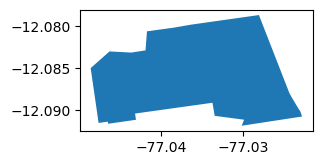

In [6]:
# Filtrar el distrito de Lince
lince = distritos[distritos.IDDIST=='150116']
lince.plot(figsize=(3,3));

Obtener el BBOX del distrito de Lince

In [7]:
# Obtener el BBOX:
bboxLince = tuple(lince.total_bounds)
bboxLince

(-77.04858598599986,
 -12.091910229999883,
 -77.02281236099992,
 -12.078710979999869)

Realizaremo la lectura de la capa de **robo_23** solo para los delitos ubicados dentro del BBOX del distrito de Lince

In [8]:
# lectura de datos con filtro por bbox
robo_bbox_lince_23 = gpd.read_file(
                                fileRobos,        # filename
                                layer='robo_23', # layername
                                bbox=bboxLince    # cuadro delimitador
                    )

Ahora visualizaremos:

In [9]:
# Visualizacion
m = robo_bbox_lince_23.explore(   
                        tiles="CartoDB positron",
                        marker_kwds={"color": "red", "radius": 8}
                        )

lince.explore(m=m,
              style_kwds={'fillOpacity':0, 'weight':4}
             )

### **Lectura filtrando por una Mask**

Realizaremo la lectura de la capa de **robo_23** solo para los delitos ubicados dentro del distrito de Lince

In [10]:
# lectura de datos con filtro por Mascara
robo_lince_23 = gpd.read_file(
                                fileRobos,        # filename
                                layer='robo_23',  # layername
                                mask=lince        # cuadro delimitador
                            )

Visualizando:

In [11]:
# Visualizacion
m = robo_lince_23.explore(   
                        tiles="CartoDB positron",
                        marker_kwds={"color": "red", "radius": 8}
                        )

lince.explore(m=m,
              style_kwds={'fillOpacity':0, 'weight':4}
             )

### **Mejorar el rendimiento con Pyogrio**

```python
gdf = gpd.read_file("datos/grandes_datos.shp", engine="pyogrio")
```

### **Conclusión**

La función **`read_file`** es la forma más sencilla y eficiente de leer datos geoespaciales en Python con GeoPandas. Dependiendo de las necesidades del usuario, se puede optar por **`Fiona`** (más estable y compatible) o **`Pyogrio`** (más rápido y con soporte para formatos modernos).